# Bilden eines Models mit Original und 2 Filtern

## Import der notwendigen Pakete

In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Laden der notwendigen Daten

In [2]:
img_dir_amaro = "FACD_image/Amaro"
img_dir_origin = "FACD_image/Origin"
img_dir_lofi = "FACD_image/Lofi"
shape = (244,244)
random_state = 42


data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

for f1 in files_origin:
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

## Datensätze vereinen und Model bilden

Es werden die Klassen Lofi, Amaro und der Orginalbilder in einem Datensatz kombiniert.
Danach wird der komplette Datensatz in die unterschiedlichen Test- und Trainingsdaten aufgeteilt.
Zum Anlernen des Models werden nur die Trainingsdaten verwendet.
Für die Validierung des Models wird die Sektion Crossvalidierung verwendet.

Der RandomForestClassifier ist eine Vielzahl von n_estimators an desicion trees.

In [3]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin, data_lofi))
y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=20, random_state=random_state, max_depth=2)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

[Text(167.4, 181.2, 'X[21962] <= 0.5\ngini = 0.666\nsamples = 1947\nvalue = [1031, 1067, 974]'),
 Text(83.7, 108.72, 'X[8417] <= 143.5\ngini = 0.528\nsamples = 1351\nvalue = [1024, 1059, 64]'),
 Text(41.85, 36.23999999999998, 'gini = 0.503\nsamples = 916\nvalue = [523, 896, 55]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.387\nsamples = 435\nvalue = [501, 163, 9]'),
 Text(251.10000000000002, 108.72, 'X[37578] <= 0.5\ngini = 0.032\nsamples = 596\nvalue = [7, 8, 910]'),
 Text(209.25, 36.23999999999998, 'gini = 0.584\nsamples = 18\nvalue = [6, 7, 17]'),
 Text(292.95, 36.23999999999998, 'gini = 0.004\nsamples = 578\nvalue = [1, 1, 893]')]

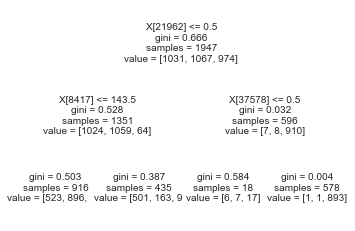

In [4]:
tree.plot_tree(classifier[1], fontsize=10)

## Crossvalidation
Die Crossvalidierung wird dazu verwendet, um sicherzustellen, dass es keinen ungünstigen Split des Datensatzes gibt.

In [5]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classifier, X_full, y_full, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

Accuracy: 0.786 (0.018)
              precision    recall  f1-score   support

       amaro       0.62      0.76      0.68       220
        lofi       0.79      0.62      0.70       306
      origin       0.94      1.00      0.97       242

    accuracy                           0.78       768
   macro avg       0.78      0.79      0.78       768
weighted avg       0.79      0.78      0.78       768



## Ausgabe des Confusion Matrix
Zur Visualisierung wird eine Heatmap verwendet, um die besonders markanten Zuordnungen schnell und intuitiv verständlich zu machen.

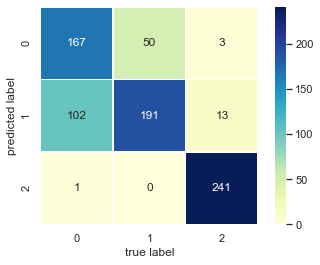

In [6]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'})
plt.xlabel('true label')
plt.ylabel('predicted label');

## Random Forest mit keiner Beschränkung für die Tiefe

In [7]:
classifier = RandomForestClassifier(n_estimators=20, random_state=random_state)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

[Text(229.970654296875, 212.91, 'X[48558] <= 0.5\ngini = 0.666\nsamples = 1971\nvalue = [1054, 1052, 966]'),
 Text(131.06697231056415, 203.85, 'X[56975] <= 10.5\ngini = 0.527\nsamples = 1378\nvalue = [1049, 1047, 60]'),
 Text(13.332743362831858, 194.79, 'X[54291] <= 3.5\ngini = 0.205\nsamples = 185\nvalue = [12, 261, 21]'),
 Text(10.36991150442478, 185.73, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 15]'),
 Text(16.295575221238938, 185.73, 'X[48748] <= 215.0\ngini = 0.123\nsamples = 178\nvalue = [12, 261, 6]'),
 Text(13.332743362831858, 176.67, 'X[24222] <= 12.5\ngini = 0.085\nsamples = 175\nvalue = [6, 261, 6]'),
 Text(5.925663716814159, 167.60999999999999, 'X[47155] <= 13.0\ngini = 0.49\nsamples = 5\nvalue = [3, 0, 4]'),
 Text(2.9628318584070796, 158.55, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 4]'),
 Text(8.888495575221238, 158.55, 'gini = 0.0\nsamples = 2\nvalue = [3, 0, 0]'),
 Text(20.73982300884956, 167.60999999999999, 'X[2656] <= 0.5\ngini = 0.037\nsamples = 170\nvalue = [3, 261, 2

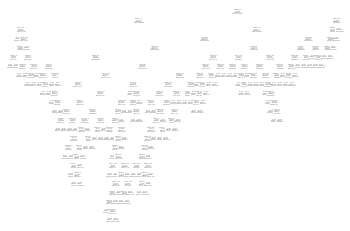

In [8]:
tree.plot_tree(classifier[8])

In [9]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classifier, X_full, y_full, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

Accuracy: 0.947 (0.012)
              precision    recall  f1-score   support

       amaro       0.95      0.94      0.94       272
        lofi       0.94      0.92      0.93       246
      origin       0.97      1.00      0.99       250

    accuracy                           0.95       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.95      0.95      0.95       768



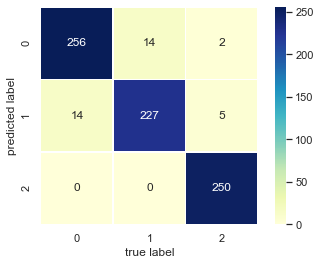

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'})
plt.xlabel('true label')
plt.ylabel('predicted label');